# Library import

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, ARDRegression, BayesianRidge
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings

warnings.filterwarnings("ignore")

In [12]:
def get_font_family():
    import platform 
    system_name = platform.system()

    if system_name == "Darwin" : # 맥
        font_family = "AppleGothic"
    elif system_name == "Windows": # 윈도우
        font_family = "Malgun Gothic"
    else: # 리눅스 및 코랩
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv
        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        font_family = "NanumBarunGothic"
    return font_family

plt.style.use("seaborn") # 전체 그래프를 seaborn 스타일로 고정
plt.rc("font", family=get_font_family())
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에 마이너스 허용

%config InlineBackend.figure_format = 'retina' # 그래프를 더 선명하게 사용


plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 120
plt.rcParams.update({'font.size': 20})

In [31]:
pd.options.display.float_format = '{:.5f}'.format

# Data Load

In [2]:
train = pd.read_csv("./data/train.csv")

In [3]:
train

,이름,팀,WAR,G,타석,타수,득점,안타,2타,3타,...,병살,희타,희비,타율,출루,장타,OPS,wOBA,WRC+,BABIP
0,테임즈,15N1B,10.71,142,595,472,130,180,42,5,...,7,0,7,0.381,0.498,0.790,1.288,0.530,222.3,0.390029
1,강정호,14넥SS,8.05,117,501,418,103,149,36,2,...,8,0,2,0.356,0.459,0.739,1.198,0.500,185.6,0.397810
2,박병호,15넥1B,7.76,140,622,528,129,181,35,1,...,10,0,4,0.343,0.436,0.714,1.150,0.481,181.9,0.402516
3,최형우,16삼LF,7.75,138,618,519,99,195,46,2,...,12,0,7,0.376,0.464,0.651,1.116,0.480,177.8,0.398058
4,서건창,14넥2B,7.63,128,616,543,135,201,41,17,...,1,4,2,0.370,0.438,0.547,0.985,0.437,150.9,0.395112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,이형종,16LLF,0.00,61,147,124,14,35,4,2,...,3,5,1,0.282,0.366,0.371,0.737,0.335,83.6,0.326923
707,윤요섭,17kDH,0.00,22,43,39,6,9,1,0,...,1,0,0,0.231,0.302,0.410,0.713,0.315,76.6,0.233333
708,박기혁,15kSS,0.00,126,350,300,27,84,13,1,...,10,16,1,0.280,0.350,0.340,0.690,0.311,71.7,0.384259
709,양성우,16한RF,0.00,108,446,384,52,104,12,4,...,6,8,6,0.271,0.347,0.354,0.701,0.324,76.1,0.313480


In [4]:
train.isna().sum()

이름       0
팀        0
WAR      0
G        0
타석       0
타수       0
득점       0
안타       0
2타       0
3타       0
홈런       0
루타       0
타점       0
도루       0
도실       0
볼넷       0
사구       0
고4       0
삼진       0
병살       0
희타       0
희비       0
타율       0
출루       0
장타       0
OPS      0
wOBA     0
WRC+     0
BABIP    0
dtype: int64

In [51]:
df = train.copy()

In [52]:
df.head()

,이름,팀,WAR,G,타석,타수,득점,안타,2타,3타,...,병살,희타,희비,타율,출루,장타,OPS,wOBA,WRC+,BABIP
0,테임즈,15N1B,10.71000,142,595,472,130,180,42,5,...,7,0,7,0.38100,0.49800,0.79000,1.28800,0.53000,222.30000,0.39003
1,강정호,14넥SS,8.05000,117,501,418,103,149,36,2,...,8,0,2,0.35600,0.45900,0.73900,1.19800,0.50000,185.60000,0.39781
2,박병호,15넥1B,7.76000,140,622,528,129,181,35,1,...,10,0,4,0.34300,0.43600,0.71400,1.15000,0.48100,181.90000,0.40252
3,최형우,16삼LF,7.75000,138,618,519,99,195,46,2,...,12,0,7,0.37600,0.46400,0.65100,1.11600,0.48000,177.80000,0.39806
4,서건창,14넥2B,7.63000,128,616,543,135,201,41,17,...,1,4,2,0.37000,0.43800,0.54700,0.98500,0.43700,150.90000,0.39511


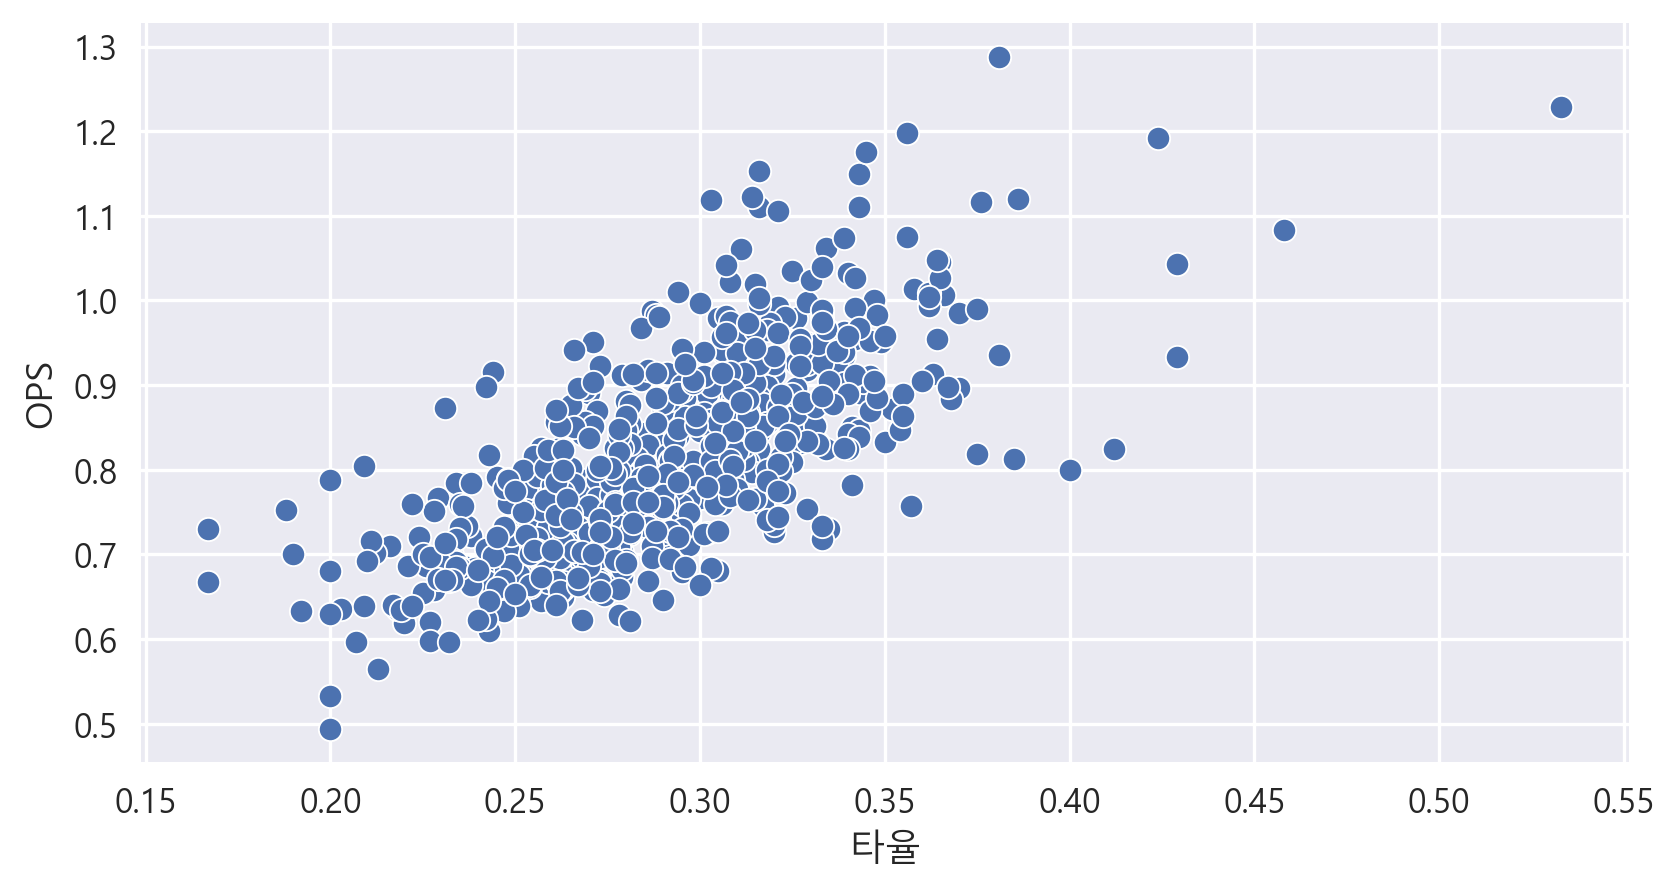

In [53]:
# outlier 존재
sns.scatterplot(x=df["타율"], y=df["OPS"])
plt.show()

In [54]:
avg_iqr = np.subtract(*np.quantile(df["타율"], [0.75, 0.25]))
avg_iqr

0.05099999999999999

In [55]:
df = df[(df["타율"] <= (np.quantile(df["타율"], 0.75) + avg_iqr*1.5)) & (df["타율"] >= (np.quantile(df["타율"], 0.25) - avg_iqr*1.5))]

In [128]:
abs(df.corr()["OPS"]).sort_values(ascending = False)[1:]

wOBA    0.96711
WRC+    0.96337
장타      0.95042
WAR     0.75524
홈런      0.72747
타율      0.71039
출루      0.70904
타점      0.66505
루타      0.63510
볼넷      0.55034
2타      0.54274
득점      0.53959
안타      0.52229
고4      0.52088
타석      0.45325
타수      0.43705
삼진      0.41461
희비      0.39902
병살      0.33906
사구      0.33654
희타      0.31463
G       0.29586
BABIP   0.26397
3타      0.12691
도실      0.08396
도루      0.06970
Name: OPS, dtype: float64

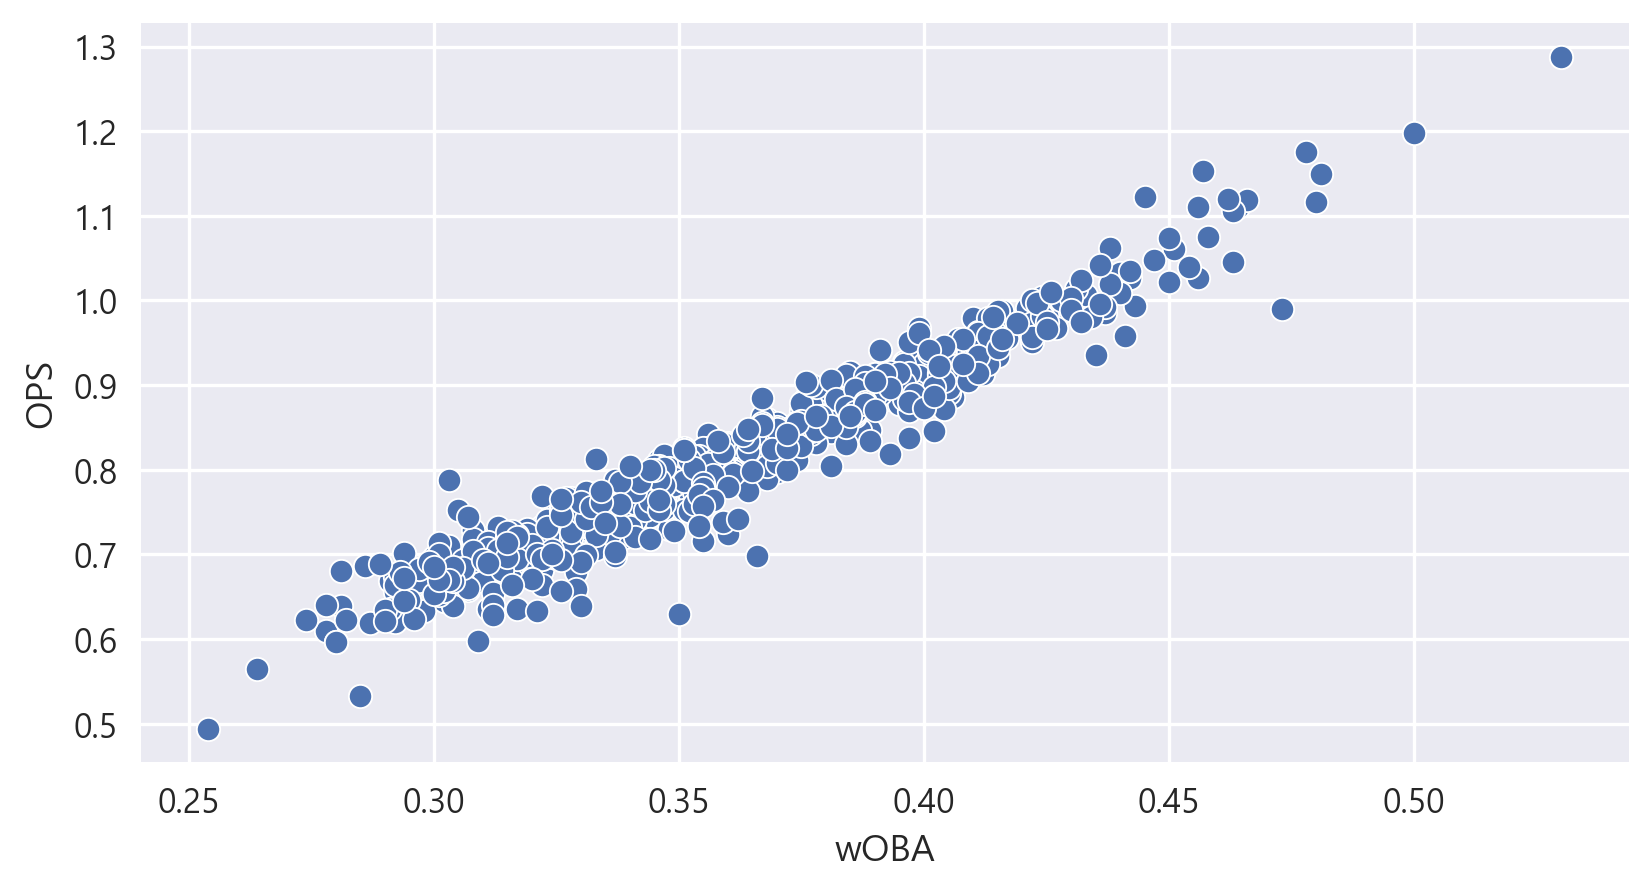

In [129]:
# outlier 제거
sns.scatterplot(x=df["wOBA"], y=df["OPS"])
plt.show()

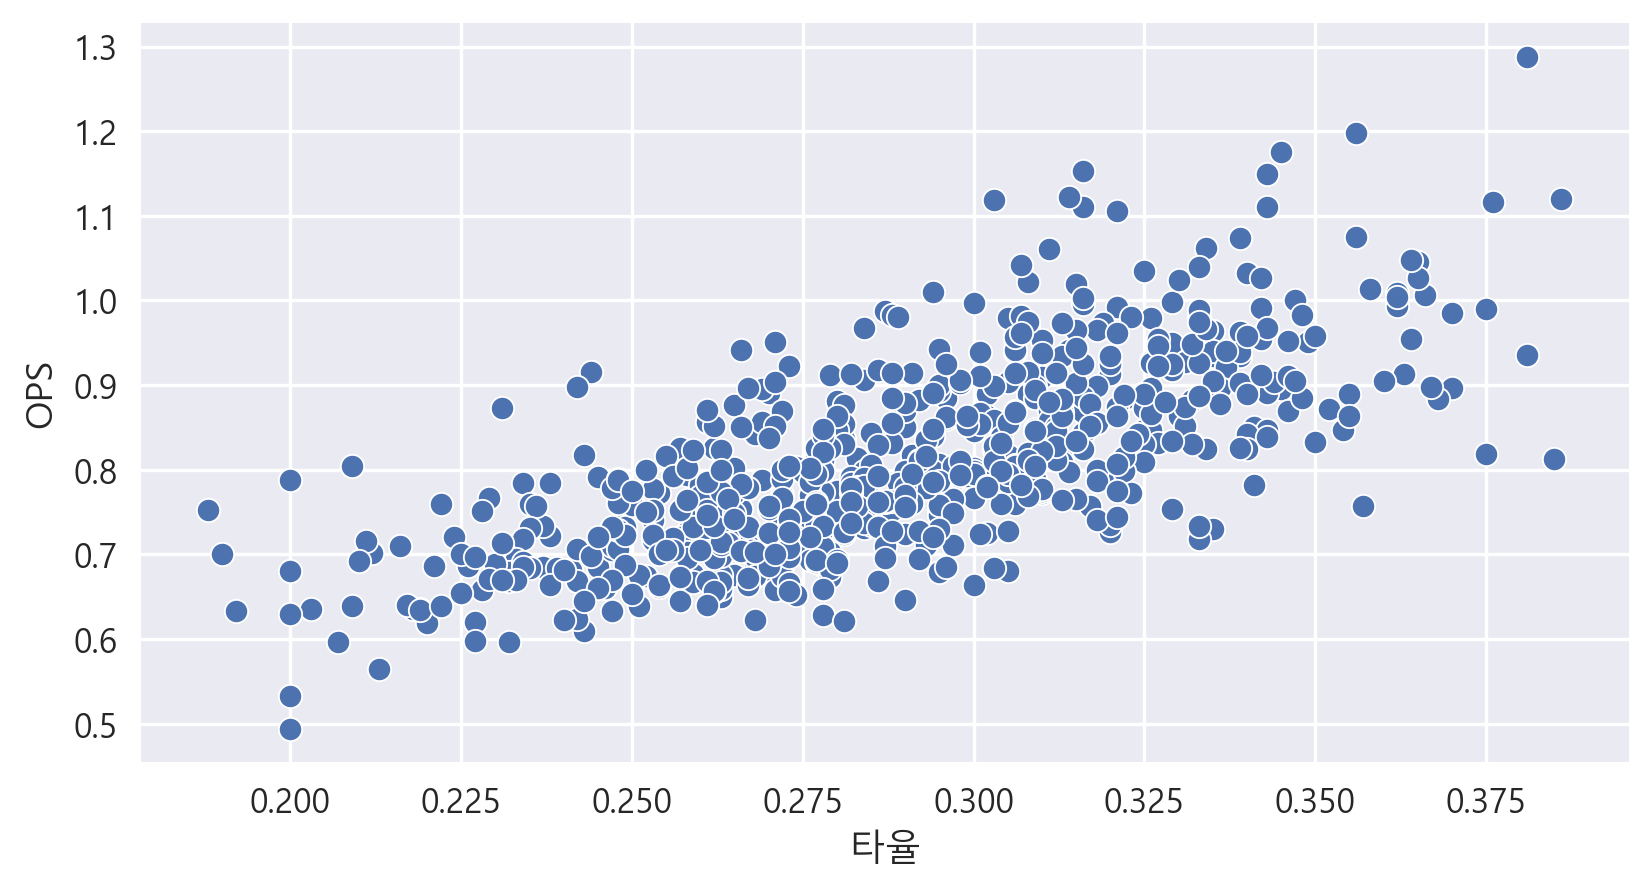

In [56]:
# outlier 제거
sns.scatterplot(x=df["타율"], y=df["OPS"])
plt.show()

In [57]:
df.shape

(702, 29)

In [58]:
df.columns

Index(['이름', '팀', 'WAR', 'G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타',
       '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율', '출루',
       '장타', 'OPS', 'wOBA', 'WRC+', 'BABIP'],
      dtype='object')

In [59]:
df = df[['이름', '팀', 'WAR', 'G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타',
       '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율', '출루',
       '장타', 'wOBA', 'WRC+', 'BABIP', "OPS"]]

In [60]:
df

,이름,팀,WAR,G,타석,타수,득점,안타,2타,3타,...,병살,희타,희비,타율,출루,장타,wOBA,WRC+,BABIP,OPS
0,테임즈,15N1B,10.71000,142,595,472,130,180,42,5,...,7,0,7,0.38100,0.49800,0.79000,0.53000,222.30000,0.39003,1.28800
1,강정호,14넥SS,8.05000,117,501,418,103,149,36,2,...,8,0,2,0.35600,0.45900,0.73900,0.50000,185.60000,0.39781,1.19800
2,박병호,15넥1B,7.76000,140,622,528,129,181,35,1,...,10,0,4,0.34300,0.43600,0.71400,0.48100,181.90000,0.40252,1.15000
3,최형우,16삼LF,7.75000,138,618,519,99,195,46,2,...,12,0,7,0.37600,0.46400,0.65100,0.48000,177.80000,0.39806,1.11600
4,서건창,14넥2B,7.63000,128,616,543,135,201,41,17,...,1,4,2,0.37000,0.43800,0.54700,0.43700,150.90000,0.39511,0.98500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,이형종,16LLF,0.00000,61,147,124,14,35,4,2,...,3,5,1,0.28200,0.36600,0.37100,0.33500,83.60000,0.32692,0.73700
707,윤요섭,17kDH,0.00000,22,43,39,6,9,1,0,...,1,0,0,0.23100,0.30200,0.41000,0.31500,76.60000,0.23333,0.71300
708,박기혁,15kSS,0.00000,126,350,300,27,84,13,1,...,10,16,1,0.28000,0.35000,0.34000,0.31100,71.70000,0.38426,0.69000
709,양성우,16한RF,0.00000,108,446,384,52,104,12,4,...,6,8,6,0.27100,0.34700,0.35400,0.32400,76.10000,0.31348,0.70100


In [61]:
df

,이름,팀,WAR,G,타석,타수,득점,안타,2타,3타,...,병살,희타,희비,타율,출루,장타,wOBA,WRC+,BABIP,OPS
0,테임즈,15N1B,10.71000,142,595,472,130,180,42,5,...,7,0,7,0.38100,0.49800,0.79000,0.53000,222.30000,0.39003,1.28800
1,강정호,14넥SS,8.05000,117,501,418,103,149,36,2,...,8,0,2,0.35600,0.45900,0.73900,0.50000,185.60000,0.39781,1.19800
2,박병호,15넥1B,7.76000,140,622,528,129,181,35,1,...,10,0,4,0.34300,0.43600,0.71400,0.48100,181.90000,0.40252,1.15000
3,최형우,16삼LF,7.75000,138,618,519,99,195,46,2,...,12,0,7,0.37600,0.46400,0.65100,0.48000,177.80000,0.39806,1.11600
4,서건창,14넥2B,7.63000,128,616,543,135,201,41,17,...,1,4,2,0.37000,0.43800,0.54700,0.43700,150.90000,0.39511,0.98500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,이형종,16LLF,0.00000,61,147,124,14,35,4,2,...,3,5,1,0.28200,0.36600,0.37100,0.33500,83.60000,0.32692,0.73700
707,윤요섭,17kDH,0.00000,22,43,39,6,9,1,0,...,1,0,0,0.23100,0.30200,0.41000,0.31500,76.60000,0.23333,0.71300
708,박기혁,15kSS,0.00000,126,350,300,27,84,13,1,...,10,16,1,0.28000,0.35000,0.34000,0.31100,71.70000,0.38426,0.69000
709,양성우,16한RF,0.00000,108,446,384,52,104,12,4,...,6,8,6,0.27100,0.34700,0.35400,0.32400,76.10000,0.31348,0.70100


In [62]:
df.drop(["이름", "팀"], axis=1, inplace=True)

## data split

In [145]:
X = df.drop("OPS", axis=1)
y = df["OPS"] 

In [146]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [147]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((561, 26), (141, 26), (561,), (141,))

In [136]:
ss = StandardScaler()

In [137]:
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [139]:
X = sm.add_constant(scaled_train)

In [150]:
model = sm.OLS(y, X)

In [151]:
model = model.fit()

In [152]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    OPS   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.306e+07
Date:                Sat, 25 Feb 2023   Prob (F-statistic):                        0.00
Time:                        17:37:04   Log-Likelihood:                          4389.7
No. Observations:                 702   AIC:                                     -8729.
Df Residuals:                     677   BIC:                                     -8616.
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
WAR         4.425e-05   4.02e-05      1.100      0.272   -3.47e-05       0.000
G           1.422e-06   1.36e-06      1.045      0.296   -1.25e-06    4.09e-06
타석          8.107e-05      0.000      0.557      0.578      -0.000       0.000
타수         -8.113e-05      0.000     -0.557      0.577      -0.000       0.000
득점          -4.62e-06   2.64e-06     -1.752      0.080    -9.8e-06    5.59e-07
안타         -2.177e-07   4.53e-06     -0.048      0.962   -9.12e-06    8.68e-06
2타         -7.321e-06   4.53e-06     -1.616      0.107   -1.62e-05    1.57e-06
3타          1.617e-05   9.98e-06      1.620      0.106   -3.43e-06    3.58e-05
홈런         -8.123e-06   5.16e-06     -1.576      0.116   -1.82e-05       2e-06
루타          4.366e-07   2.81e-06      0.156      0.876   -5.07e-06    5.95e-06
타점          6.472e-06   2.71e-06      2.389      0.017    1.15e-06    1.18e-05
도루          8.955e-06   4.05e-06      2.211      0.027       1e-06    1.69e-05
도실         -2.239e-05   9.35e-06     -2.395      0.017   -4.07e-05   -4.03e-06
볼넷         -8.551e-05      0.000     -0.588      0.557      -0.000       0.000
사구         -8.142e-05      0.000     -0.560      0.575      -0.000       0.000
고4          5.161e-06   1.36e-05      0.379      0.705   -2.16e-05    3.19e-05
삼진          2.428e-06   1.63e-06      1.493      0.136   -7.66e-07    5.62e-06
병살         -2.865e-06   6.19e-06     -0.463      0.644    -1.5e-05    9.29e-06
희타         -7.427e-05      0.000     -0.509      0.611      -0.000       0.000
희비            -0.0001      0.000     -0.719      0.472      -0.000       0.000
타율             0.0025      0.002      1.515      0.130      -0.001       0.006
출루             0.9956      0.003    357.383      0.000       0.990       1.001
장타             0.9973      0.001    756.202      0.000       0.995       1.000
wOBA           0.0065      0.004      1.631      0.103      -0.001       0.014
WRC+        2.179e-06    2.2e-06      0.989      0.323   -2.15e-06     6.5e-06
BABIP         -0.0016      0.001     -2.119      0.034      -0.003      -0.000
==============================================================================
Omnibus:                       19.498   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.253
Skew:                          -0.012   Prob(JB):                     6.68e-10
Kurtosis:                       4.202   Cond. No.                     1.13e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenva

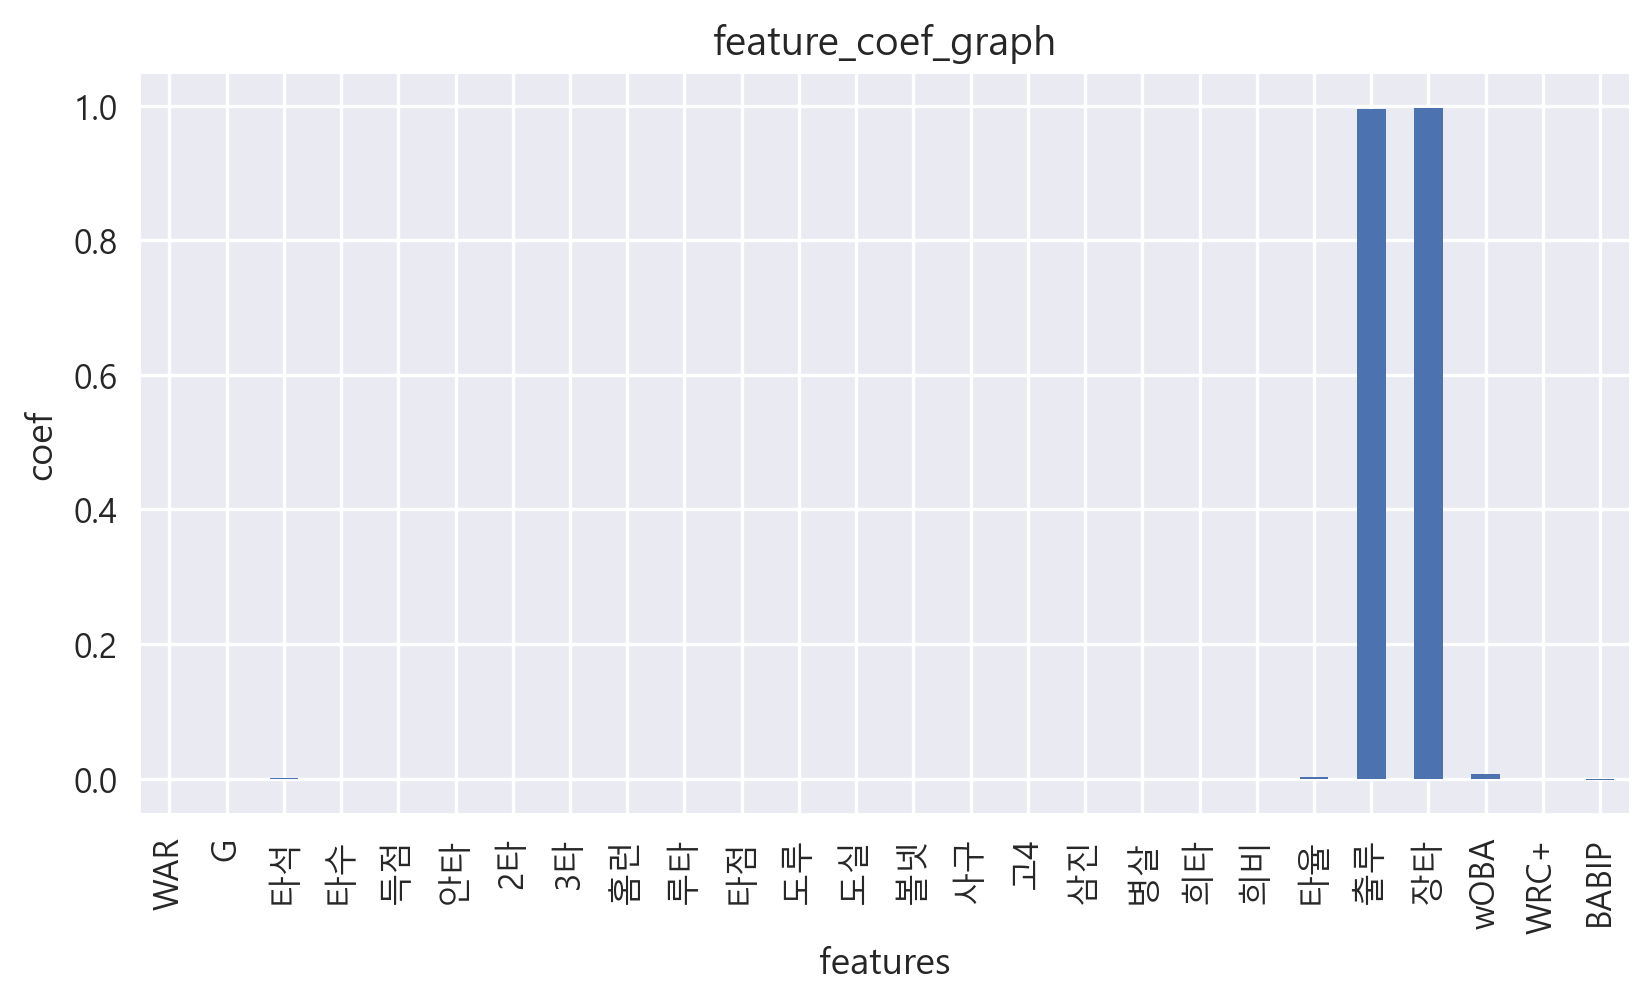

In [153]:
# 계수 시각화
# 회귀 계수를 시리즈로 변환
coefs = model.params.tolist()
coefs_se = pd.Series(coefs)

# 변수명을 리스트로 반환
x_labels = model.params.index.tolist()

ax = coefs_se.plot(kind = "bar")
ax.set_title("feature_coef_graph")
ax.set_xlabel("features")
ax.set_ylabel("coef")
ax.set_xticklabels(x_labels)
plt.show()

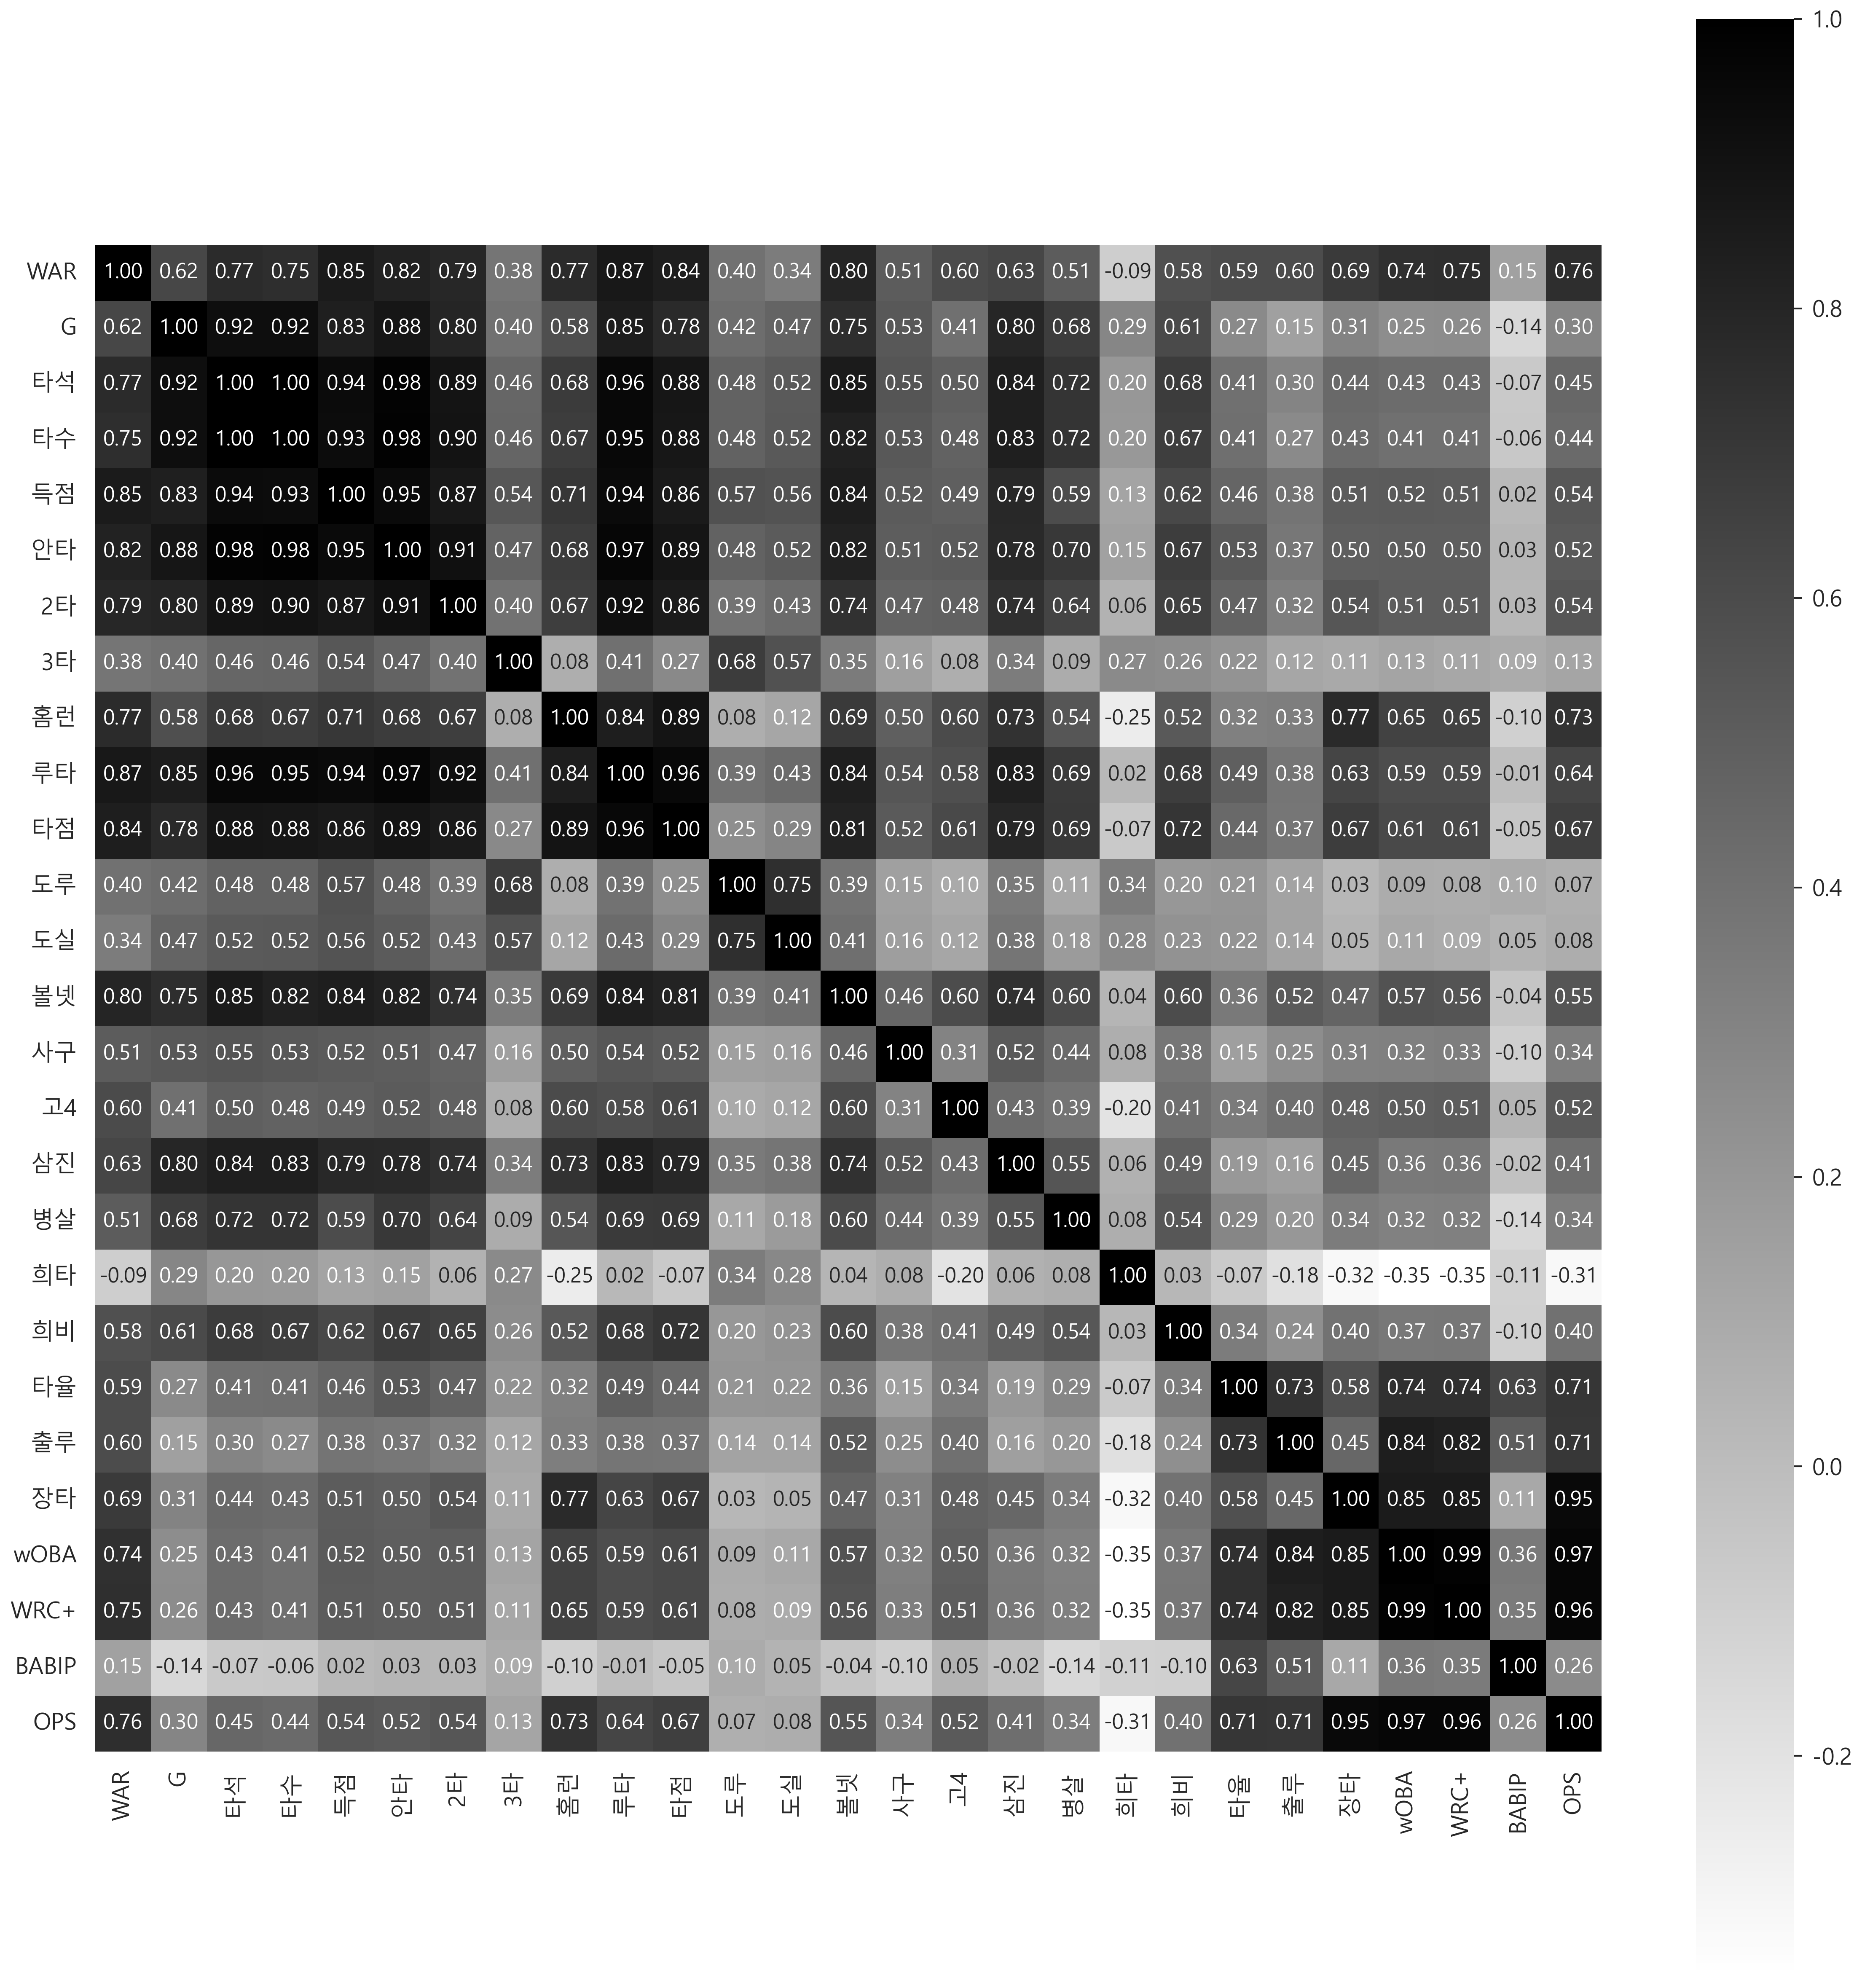

In [159]:
# 피처들의 상관관계 시각화
plt.figure(figsize=(20, 20))
corr = df.corr()
sns.set(font_scale = 1.5, font = "Malgun Gothic")
hm = sns.heatmap(corr.values, cbar = True, annot = True, square = True, fmt = ".2f", annot_kws = {"size" : 15},
                 yticklabels = df.columns, xticklabels = df.columns, cmap="gray_r")

plt.tight_layout()
plt.show()

In [160]:
# 피처마다 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["feature"] = X.columns
vif.round(1)

,VIF_Factor,feature
0,31.00000,WAR
1,60.90000,G
2,9646686.40000,타석
3,7388955.30000,타수
4,69.60000,득점
5,inf,안타
6,inf,2타
7,inf,3타
8,inf,홈런
9,inf,루타


# modeling

In [37]:
rf = RandomForestRegressor()

In [38]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [39]:
rf.score(x_test, y_test)

0.988619764582644

In [40]:
pred = rf.predict(x_test)

In [41]:
np.sqrt(mean_squared_error(y_test, pred))

0.012670205207493665

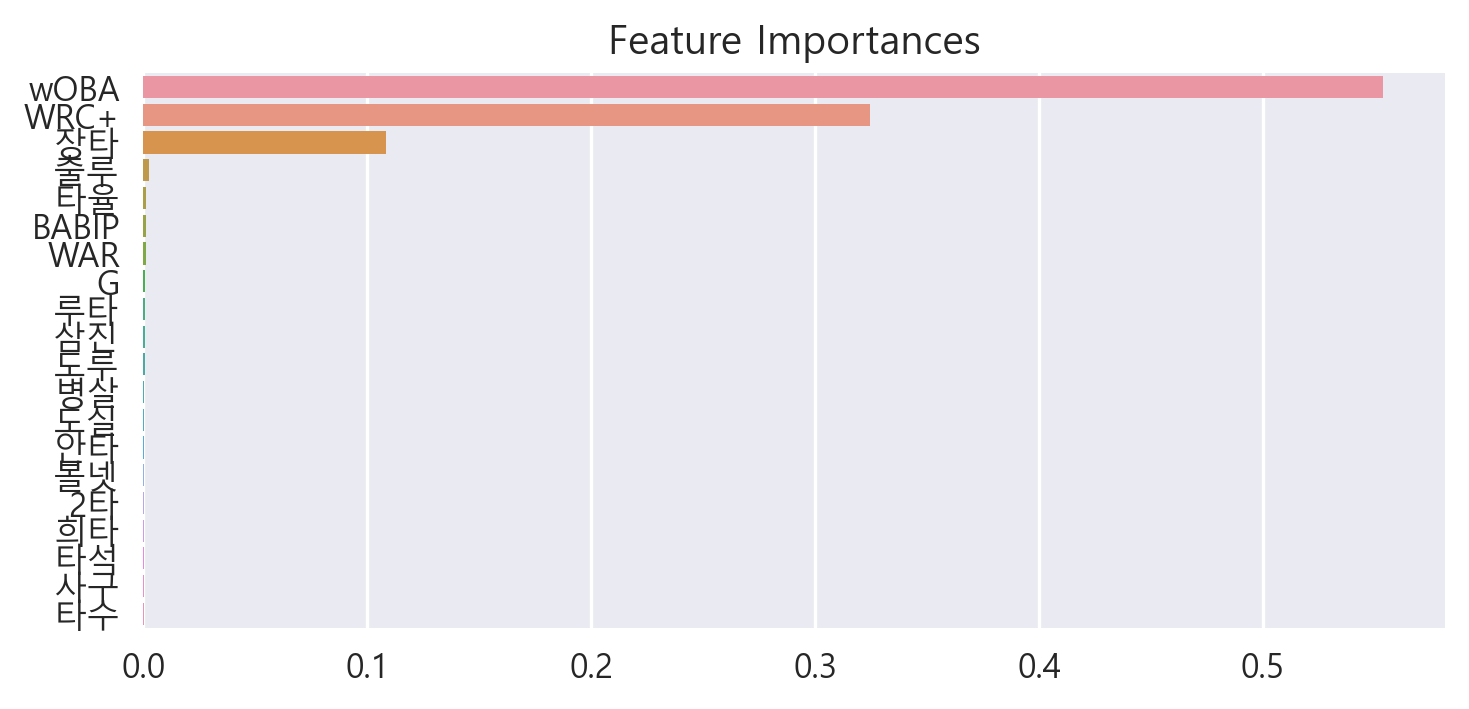

In [45]:
# 특성중요도 확인
fea_importance = rf.feature_importances_
fea_importances = pd.Series(fea_importance, index = x_train.columns)
fea_20 = fea_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(7,3))
plt.title('Feature Importances')
sns.barplot(x=fea_20, y=fea_20.index)
plt.show()

- 랜덤 포레스트, 트리 계열 알고리즘의 특징인 특성 중요도로 변수 선택을 하였다.
- 특성 중요도, 즉 컬럼에 영향을 미치는 영향이 큰 wOBA, WRC+, 장타 위의 3가지 변수가 가장 종속변수인 OPS에 큰 영향을 미쳤고 이에 따라 위의 3가지 변수만 선택하여 모델링을 진행

In [64]:
X = df[["wOBA", "WRC+", "장타"]]
y = df["OPS"]

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [67]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((561, 3), (141, 3), (561,), (141,))

In [70]:
np.random.seed(29)

In [89]:
preprocess = FeatureUnion([("std", StandardScaler())])

In [91]:
pipe = Pipeline([("preprocess", preprocess),
                ("classifier", RandomForestRegressor())])

In [92]:
search_space = [{"classifier" : [LinearRegression()]},
                {"classifier" : [Ridge()]},
                {"classifier" : [Lasso()]},
                {"classifier" : [ElasticNet()]},
                {"classifier" : [ARDRegression()]},
                {"classifier" : [BayesianRidge()]},
                {"classifier" : [RandomForestRegressor()],
                 "classifier__n_estimators" : [10, 100, 1000],
                 "classifier__max_features" : [1, 2, 3],
                 "classifier__min_impurity_decrease" : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]},
                 {"classifier" : [SVR()],
                  "classifier__kernel" : ["rbf", "poly"],
                  "classifier__C" : np.arange(0, 1, 0.1)}]

In [93]:
gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=2)

In [94]:
best_model = gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 71 candidates, totalling 355 fits
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Lasso(); total time=   0.0s
[CV] END .................................class

In [95]:
best_model.best_estimator_

Pipeline(steps=[('preprocess',
                 FeatureUnion(transformer_list=[('std', StandardScaler())])),
                ('classifier', BayesianRidge())])

In [96]:
grid_pred = best_model.predict(x_test)

In [97]:
# 랜덤포레스트 베이스 모델
np.sqrt(mean_squared_error(y_test, pred))

0.012670205207493665

In [98]:
# 그리드 서치를 통한 모델
np.sqrt(mean_squared_error(y_test, grid_pred))

0.009789365971116097

- 랜덤 포레스트 베이스 모델을 사용하여 선택한 것 보다 더 좋은 결과를 확인 할 수 있다.

In [103]:
X = df.drop("OPS", axis=1)
y = df["OPS"] 

In [105]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [106]:
preprocess_all = FeatureUnion([("std", StandardScaler()), ("pca", PCA())])

In [107]:
pipe = Pipeline([("preprocess", preprocess),
                ("classifier", RandomForestRegressor())])

In [108]:
search_space = [{"classifier" : [LinearRegression()]},
                {"classifier" : [Ridge()]},
                {"classifier" : [Lasso()]},
                {"classifier" : [ElasticNet()]},
                {"classifier" : [ARDRegression()]},
                {"classifier" : [BayesianRidge()]},
                {"classifier" : [RandomForestRegressor()],
                 "classifier__n_estimators" : [10, 100, 1000],
                 "classifier__max_features" : [1, 2, 3],
                 "classifier__min_impurity_decrease" : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]},
                 {"classifier" : [SVR()],
                  "classifier__kernel" : ["rbf", "poly"],
                  "classifier__C" : np.arange(0, 1, 0.1)}]

In [109]:
gridsearch_all = GridSearchCV(pipe, search_space, cv=5, verbose=2)

In [110]:
best_model_all = gridsearch_all.fit(x_train, y_train)

Fitting 5 folds for each of 71 candidates, totalling 355 fits
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Lasso(); total time=   0.0s
[CV] END .................................class

In [111]:
best_model_all.best_estimator_

Pipeline(steps=[('preprocess',
                 FeatureUnion(transformer_list=[('std', StandardScaler())])),
                ('classifier', ARDRegression())])

In [112]:
pred_all = best_model_all.predict(x_test)

In [114]:
print(f"base model rmse : {np.sqrt(mean_squared_error(y_test, pred))}")
print(f"랜덤포레스트 feature_importances를 활용한 후 rmse : {np.sqrt(mean_squared_error(y_test, grid_pred))}")
print(f"모든 데이터를 활용하여 전처리 후 rmse : {np.sqrt(mean_squared_error(y_test, pred_all))}")

base model rmse : 0.012670205207493665
랜덤포레스트 feature_importances를 활용한 후 rmse : 0.009789365971116097
모든 데이터를 활용하여 전처리 후 rmse : 0.0004892561002516045


- 모든 데이터를 활용하여 정규화와 차원축소를 이용하여 데이터를 전처리 한 후 결과가 가장 좋게 나타났다.

In [115]:
test = pd.read_csv("./data/test.csv")

In [116]:
test

,이름,팀,WAR,G,타석,타수,득점,안타,2타,3타,...,병살,희타,희비,타율,출루,장타,OPS,wOBA,WRC+,BABIP
0,김하성,19키SS,7.17000,139,625,540,112,166,38,2,...,12,1,7,0.30700,0.38900,0.49100,0.88000,0.39700,145.70000,0.32812
1,양의지,19NC,6.69000,118,459,390,61,138,26,0,...,13,0,6,0.35400,0.43800,0.57400,1.01200,0.45200,179.80000,0.35435
2,최정,19S3B,6.32000,141,606,503,86,147,27,0,...,4,0,8,0.29200,0.39900,0.51900,0.91800,0.41100,148.90000,0.30256
3,샌즈,19키RF,6.16000,139,613,525,100,160,39,1,...,17,0,5,0.30500,0.39600,0.54300,0.93900,0.42100,163.00000,0.32918
4,로하스,19KCF,5.49000,142,576,520,68,167,29,3,...,4,0,5,0.32100,0.37900,0.52700,0.90500,0.40500,151.30000,0.37533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,양성우,19한LF,-0.77000,56,129,119,11,20,3,0,...,2,1,0,0.16800,0.22700,0.21800,0.44500,0.21400,20.60000,0.21111
247,전병우,19롯1B,-0.79000,28,54,50,2,5,1,0,...,0,1,0,0.10000,0.15100,0.12000,0.27100,0.13400,-35.30000,0.17857
248,노시환,19한1B,-0.80000,91,192,177,19,33,8,1,...,3,1,1,0.18600,0.24100,0.26000,0.50100,0.23700,36.40000,0.30476
249,김동엽,19삼DH,-0.85000,60,211,195,15,42,4,1,...,2,0,2,0.21500,0.26500,0.33800,0.60400,0.27900,60.70000,0.25000


In [117]:
test.drop(["이름", "팀"], axis=1, inplace=True)

In [119]:
X = test.drop("OPS", axis=1)
y = test["OPS"]

In [121]:
test_predict = best_model_all.predict(X)

In [122]:
print(f"실제 데이터와의 rmse : {np.sqrt(mean_squared_error(y, test_predict))}")

실제 데이터와의 rmse : 0.0005109939465534693
